# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [3]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)


**Note:** Restart the kernel to use updated package(s).

In [88]:
#import libraries
import pandas as pd
import numpy as np

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data.

### **1.1.** Problem Statement
In the film industry, various factors contribute to a movie's success and audience reception. Among these factors, runtime is often debated in terms of its impact on a movie's overall rating. This study aims to explore the relationship between the runtime of movies and their ratings to understand if and how the length of a film affects its critical and audience reception.

## Datasets

#### 1. Hydra Movies Dataset  
This dataset, available on [Kaggle](https://www.kaggle.com), includes detailed information about movies, including directors, writers, cast, and more.  

#### 2. OMDb API Data  
Additional data will be gathered using the [OMDb (Open Movie Database) API](https://www.omdbapi.com). This API provides access to a large repository of movie information, including ratings, which will be used to supplement the analysis.  


### **1.2.** Gather at least two datasets using two different data gathering methods

#### **Dataset 1**

**Type:** CSV File

**Method:** The data was gathered via Manual Download from Kaggle as linked above.

**Dataset variables:**

| Column Name       | Description                                      |
|-------------------|--------------------------------------------------|
| **Title**        | The title of the movie.                          |
| **Year**         | The year the movie was released.                 |
| **Summary**      | A full summary of the movie.                     |
| **Short Summary** | A brief summary of the movie.                   |
| **Genres**       | The genres the movie falls into.                 |
| **Runtime**      | The length of the movie in minutes.              |
| **YouTube Trailer** | The YouTube trailer ID for the movie.          |
| **Rating**       | The rating of the movie.                         |
| **Movie Poster** | The URL path for the movie poster.               |
| **Director**     | The director of the movie.                       |
| **Writers**      | The writers of the movie.                        |
| **Cast**         | The cast of the movie.                           |


In [89]:
#FILL IN 1st data gathering and loading method
movies_first= pd.read_csv('Hydra-Movie-Scrape.csv')

# Show two rows as example from dataset
movies_first.head(2)

,index,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
0,0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...","Patton Oswalt, despite a personal tragedy, pro...",Uncategorized,tt7026230,66,4hZi5QaMBFc,7.4,https://hydramovies.com/wp-content/uploads/201...,Bobcat Goldthwait,Patton Oswalt,Patton Oswalt
1,1,New York Doll,2005,A recovering alcoholic and recently converted ...,A recovering alcoholic and recently converted ...,Documentary|Music,tt0436629,75,jwD04NsnLLg,7.9,https://hydramovies.com/wp-content/uploads/201...,Greg Whiteley,Arthur Kane,Sylvain Sylvain


#### Dataset 2

**Type:** CSV File from API.

**Method:** The data was gathered using the "API" method from OMDb.

A snippet of the API request code, I have changed the csv file this code saves to, so it would not replace the csv gathered.

**Note:** Had to include so much more Movie Id's to get the data.




In [90]:
#import request library to use collect data by API method

import requests

In [91]:
API_KEY = 'd338cb0e'
BASE_URL = 'http://www.omdbapi.com/'

def get_movie_details(imdb_id):
    params = {
        'apikey': API_KEY,
        'i': imdb_id
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()

def main():
    imdb_ids = [
    'tt0133093', 'tt0120737', 'tt1375666', 'tt0468569', 'tt0076759', 'tt0050083', 'tt0068646', 
    'tt0137523', 'tt0109830', 'tt0110912', 'tt0060196', 'tt0080684', 'tt0167260', 'tt0071562']

    movies = []
    
    for imdb_id in imdb_ids:
        movie = get_movie_details(imdb_id)
        if movie:
            movies.append(movie)

    fetch_data = []
    for movie in movies:
        title = movie.get('Title', 'Unknown')
        rating = movie.get('imdbRating', 'N/A')
        genre = movie.get('Genre', 'N/A')
        runtime = movie.get('Runtime', 'N/A')

        fetch_data.append({
            'Title': title,
            'Rating': rating,
            'Genre': genre,
            'Runtime': runtime
        })

    # Convert to DataFrame and save to CSV
    df = pd.DataFrame(fetch_data)
    df.to_csv('fetch_data.csv', index=False)
    print('Data saved to fetch_data.csv')
    print(f"Total movies fetched: {len(movies)}")

if __name__ == "__main__":
    main()

Data saved to fetch_data.csv
Total movies fetched: 14


In [92]:
#Read CSV file
movies_sec=pd.read_csv('movies_data.csv')

# Show two rows as example from dataset
movies_sec.head(2)

,Title,Rating,Genre,Runtime
0,Le caviar rouge,4.1,Drama,92 min
1,The Octopuses from the Second Floor,6.9,"Comedy, Family, Sci-Fi",92 min


## Dataset Details:
The second dataset used in this analysis includes the following columns:

| Column Name       | Description                                      |
|-------------------|--------------------------------------------------|
| **Title**        | The name of the movie.                        |
| **Rating**         | The average rating of the movie, typically on a scale from 0 to 10.|
| **Genre**      | The genre or genres that describe the movie. Multiple genres are listed, separated by commas.|
| **Runtime**      | The total duration of the movie, expressed in minutes.              |



## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

## 2.1 Completeness:
#### **1.** Checking the first dataset (movies_first) visually via viewing the first 5 rows and another 5 random rows.

In [93]:
movies_first.head()


,index,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
0,0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...","Patton Oswalt, despite a personal tragedy, pro...",Uncategorized,tt7026230,66,4hZi5QaMBFc,7.4,https://hydramovies.com/wp-content/uploads/201...,Bobcat Goldthwait,Patton Oswalt,Patton Oswalt
1,1,New York Doll,2005,A recovering alcoholic and recently converted ...,A recovering alcoholic and recently converted ...,Documentary|Music,tt0436629,75,jwD04NsnLLg,7.9,https://hydramovies.com/wp-content/uploads/201...,Greg Whiteley,Arthur Kane,Sylvain Sylvain
2,2,Mickey's Magical Christmas: Snowed in at the H...,2001,After everyone is snowed in at the House of Mo...,Mickey and all his friends hold their own Chri...,Adventure|Animation|Comedy|Family|Fantasy,tt0300195,65,uCKwHHftrU4,6.8,https://hydramovies.com/wp-content/uploads/201...,Tony Craig,Thomas Hart,Carlos Alazraqui|Wayne Allwine
3,3,Mickey's House of Villains,2001,The villains from the popular animated Disney ...,The villains from the popular animated Disney ...,Animation|Comedy|Family|Fantasy|Horror,tt0329374,0,JA03ciYt-Ek,6.6,https://hydramovies.com/wp-content/uploads/201...,Jamie Mitchell,Thomas Hart,Tony Anselmo|Wayne Allwine
4,4,And Then I Go,2017,"In the cruel world of junior high, Edwin suffe...","In the cruel world of junior high, Edwin suffe...",Drama,tt2018111,99,8CdIiD6-iF0,7.6,https://hydramovies.com/wp-content/uploads/201...,Vincent Grashaw,Brett Haley,Arman Darbo|Sawyer Barth


**Note:** We notice that there are null values in the Genre column represented as **Uncategorized** & runtime as **0**.

In [94]:
# Randomly select 5 rows from the movies_first DataFrame
# The random_state parameter ensures the same rows are selected every time for reproducibility
movies_first.sample(5, random_state=41)

,index,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
2307,2307,From Paris with Love,2010,James Reece is an ambitious aide to the U.S. A...,"In Paris, a young employee in the office of th...",Action|Crime|Thriller,tt1179034,92,CDR4WLX7V-I,6.5,https://hydramovies.com/wp-content/uploads/201...,Pierre Morel,Adi Hasak,John Travolta|Jonathan Rhys Meyers|Kasia Smutniak
2672,2672,Arthur Christmas,2011,"Arthur Christmas reveals the incredible, never...",Santa's clumsy son Arthur sets out on a missio...,Action|Adventure|Animation|Comedy|Drama,tt1430607,97,eMiyMkS1DNY,7.1,https://hydramovies.com/wp-content/uploads/201...,Sarah Smith,Peter Baynham,Bill Nighy|James McAvoy|Jim Broadbent
619,619,Café Society,2016,"In 1930's Hollywood, the powerful agent, Phil ...","In the 1930s, a Bronx native moves to Hollywoo...",Action|Comedy|Drama|Romance,tt4513674,96,Rl4X6pFfmTI,6.6,https://hydramovies.com/wp-content/uploads/201...,Woody Allen,Woody Allen,Jesse Eisenberg|Kristen Stewart|Steve Carell
2031,2031,Life in a Day,2011,What do you get when you ask the people of the...,A documentary shot by film-makers all over the...,Documentary|Drama,tt1687247,95,bT_UmBHMYzg,7.7,https://hydramovies.com/wp-content/uploads/201...,Loressa Clisby,Hiroaki Aikawa,NaN
1141,1141,Unstoppable,2010,A runaway train carrying a cargo of toxic chem...,"With an unmanned, half-mile-long freight train...",Action|Thriller,tt0477080,98,fyuoIqeL-bc,6.8,https://hydramovies.com/wp-content/uploads/201...,Tony Scott,Mark Bomback,Chris Pine|Denzel Washington|Rosario Dawson


**Note:** Cast column has null values too. We summarize that the Rating & Runtime column being the center of our study are the most important ones and it appears they have null values.

#### **2.** Checking the second dataset (movies) visually via viewing the first 5 rows and another 5 random rows.

In [95]:
movies_sec.head()

,Title,Rating,Genre,Runtime
0,Le caviar rouge,4.1,Drama,92 min
1,The Octopuses from the Second Floor,6.9,"Comedy, Family, Sci-Fi",92 min
2,Cocaine Wars,4.3,"Action, Drama",82 min
3,Crossroads,7.1,"Drama, Music, Mystery",99 min
4,A Deadly Business,5.9,Drama,96 min


In [96]:
movies_sec.sample(5, random_state=42)


,Title,Rating,Genre,Runtime
201,Moonwalker,6.1,"Action, Crime, Fantasy",93 min
213,Il caso Pupetta Maresca,NaN,Documentary,60 min
138,Three O'Clock High,7.1,Comedy,101 min
177,Einstweilen wird es Mittag oder Die Arbeitslos...,6.2,NaN,95 min
15,Hell High,5.1,"Crime, Horror, Thriller",84 min


**Note:** Apparently this dataset has null values in Runtime, Genre, Rating columns too.

## 2.2 Inspecting the dataframe programmatically.


#### **1.** Checking the first dataset (movies_first) programmatically.



In [97]:
movies_first.shape

(3940, 14)

**Note:** This data has the complete number of rows as mentioned in Kaggle "weighing in at an impressive 3,940 movies total".

In [98]:
movies_first.isnull().sum()

index               0
Title               0
Year                0
Summary             5
Short Summary       1
Genres              0
IMDB ID             0
Runtime             0
YouTube Trailer    47
Rating              0
Movie Poster        0
Director            0
Writers            18
Cast               24
dtype: int64

**Note:** As we focus on the Runtime, Rating columns this shows they do not have any null values which is invalid and leads us to the next quality issue.

In [99]:
movies_first[movies_first['Runtime'] == 0 ].shape[0]

193

**Note:** Rating column has empty records that need to be handled in the cleaning stage.

In [100]:
movies_first[movies_first['Rating'] == 0 ].shape[0]

0

**Note:** No null values in this column.

#### **2.** Checking the second dataset (movies_sec) programmatically.

In [101]:
movies_sec.shape

(216, 4)

**Note:** I have acquired 216 records via the API request which is true as saved into the csv file.

In [102]:
movies_sec.isnull().sum()

Title       0
Rating     30
Genre      23
Runtime    27
dtype: int64

**Note:** There is 30 null values in the Rating, 27 in Runtime columns and 23 on Genre columns.

In [103]:
movies_sec[movies_sec['Runtime'] == 0 ].shape[0]

0

**Note:** Both datasets contain null values which will be handled in the cleaning stage.

## 2.3 Validity

Checking: **Misrepresented** null values and **erroneous data types.**


#### **1.**  Visually & Programmatically for the First Dataset:



In [104]:
movies_first.head(1)

,index,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
0,0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...","Patton Oswalt, despite a personal tragedy, pro...",Uncategorized,tt7026230,66,4hZi5QaMBFc,7.4,https://hydramovies.com/wp-content/uploads/201...,Bobcat Goldthwait,Patton Oswalt,Patton Oswalt


In [105]:
movies_first.dtypes

index                int64
Title               object
Year                 int64
Summary             object
Short Summary       object
Genres              object
IMDB ID             object
Runtime              int64
YouTube Trailer     object
Rating             float64
Movie Poster        object
Director            object
Writers             object
Cast                object
dtype: object

In [106]:
movies_first.describe()

,index,Year,Runtime,Rating
count,3940.000000,3940.000000,3940.000000,3940.000000
mean,1969.500000,2012.132741,100.353553,6.555685
std,1137.524359,4.821189,29.798215,0.892572
min,0.000000,2000.000000,0.000000,1.700000
25%,984.750000,2009.000000,91.000000,6.100000
50%,1969.500000,2013.000000,102.000000,6.600000
75%,2954.250000,2016.000000,115.000000,7.100000
max,3939.000000,2018.000000,338.000000,9.500000


Since **Year** min: 2000 and max: 2018, it can be enhanced into **int16**.

Also, for **Runtime** having min: 0 max: 338, it can be enhnaced into **int16** thus eliminating the seconds.

same goes for **Rating** having min: 1.7 max: 9.5 it can be enhnaced into **float16**.

In [107]:
movies_first[movies_first['Genres'] == 'Uncategorized' ].shape[0]

25

**Note:** There are 25 movies labelled as 'Uncategorized' instead of NaN.

In [108]:
movies_first[movies_first['Runtime'] == 0 ].shape[0]

193

**Note:** There are 193 movies with the value of 0 instead of NaN.

As the misrepresented data leads to unusable data so both issues this and erroneous data types will be handled in the cleaning stage.

#### **1.**  Visually & Programmatically for the Second Dataset:


In [109]:
movies_sec.head(1)

,Title,Rating,Genre,Runtime
0,Le caviar rouge,4.1,Drama,92 min


In [110]:
movies_sec.dtypes

Title       object
Rating     float64
Genre       object
Runtime     object
dtype: object

In [111]:
movies_sec.describe()

,Rating
count,186.000000
mean,5.909140
std,1.357252
min,2.000000
25%,5.000000
50%,6.050000
75%,6.900000
max,8.800000


**Rating** seems to be normally distributed with min: 2 max: 8.8 thus it can be enhanced into **float16**.

**Runtime** should be stored into a **int16** rather than object which makes it managable and benefecial for the study focus and more consistent with the first dataset.

## 2.4 Consistency


In [112]:
movies_first.Genres[1]

'Documentary|Music'

In [113]:
movies_sec.Genre[1]

'Comedy, Family, Sci-Fi'

We notice that Genres are **separated by a comma in the second dataset** while the **first is separated by a vertical bar, which is onconsistent**.

Moreover, the **Genre column names are the only inconsistent** ones betweent the two datasets.

## 2.4 Uniqueness

#### For the first Dataset:


In [114]:
duplicate_counts = movies_first['Title'].value_counts()[movies_first['Title'].value_counts() > 1]
print(duplicate_counts)

Title
The Gift           2
Fantastic Four     2
Gifted             2
The Colony         2
Frozen             2
Wonder Woman       2
Gold               2
Life               2
The Outsider       2
Youth              2
Restless           2
Extinction         2
Beyond the Edge    2
Name: count, dtype: int64


In [115]:
# Identify duplicate rows based on the 'Title' column
duplicates = movies_first[movies_first.duplicated('Title', keep=False)]
duplicates_df = pd.DataFrame(duplicates)

In [116]:
duplicates_df.shape[0]

26

**Note:** There are 13 movies that are duplicated!

In [117]:
duplicates_df[duplicates_df['Title'] == 'Frozen']

,index,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
2303,2303,Frozen,2013,Fearless optimist Anna teams up with rugged mo...,When the newly-crowned Queen Elsa accidentally...,Action|Adventure|Animation|Comedy|Family,tt2294629,102,FLzfXQSPBOg,7.5,https://hydramovies.com/wp-content/uploads/201...,Chris Buck,Jennifer Lee,Idina Menzel|Kristen Bell
2304,2304,Frozen,2010,"At Mount Holliston, snowboarders Dan Walker, h...",Three skiers stranded on a chairlift are force...,Action|Drama|Thriller,tt1323045,93,7Wmro5jBViA,6.2,https://hydramovies.com/wp-content/uploads/201...,Adam Green,Adam Green,Emma Bell|Kevin Zegers|Shawn Ashmore


if we take any duplicate i.e: Wonder Woman or Frozen we notice that the records are **mostly different**, it's hard to determine which is right which leads to **cross checking if the same movies are in the other dataset or dropping them to get more valid & accurate results for our study**.



For the Second Dataset:


In [118]:
duplicate_counts2 = movies_sec['Title'].value_counts()[movies_sec['Title'].value_counts() > 1]
print(duplicate_counts2)

Title
#DUPE#    6
Name: count, dtype: int64


In [119]:
# Identify duplicate rows based on the 'Title' column
duplicates2 = movies_sec[movies_sec.duplicated('Title', keep=False)]
duplicates_df2 = pd.DataFrame(duplicates)

In [120]:
duplicates_df2[duplicates_df2['Title'] == '#DUPE#']

,index,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast


**Note:** In this dataset we notice that there are duplicates yet they're all identical so we can drop the copy.



### Tidiness Issue 1:

### a. Inspecting The First Dataset:

In [121]:
movies_first.head(2)

,index,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
0,0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...","Patton Oswalt, despite a personal tragedy, pro...",Uncategorized,tt7026230,66,4hZi5QaMBFc,7.4,https://hydramovies.com/wp-content/uploads/201...,Bobcat Goldthwait,Patton Oswalt,Patton Oswalt
1,1,New York Doll,2005,A recovering alcoholic and recently converted ...,A recovering alcoholic and recently converted ...,Documentary|Music,tt0436629,75,jwD04NsnLLg,7.9,https://hydramovies.com/wp-content/uploads/201...,Greg Whiteley,Arthur Kane,Sylvain Sylvain


There are multiple values in the **Genres column**, should be separated or if not needed dropped same goes for **Summary and Short Summary** which aren't needed in our study.

### b. Inspecting The Second Dataset:

In [122]:
movies_sec.head(2)

,Title,Rating,Genre,Runtime
0,Le caviar rouge,4.1,Drama,92 min
1,The Octopuses from the Second Floor,6.9,"Comedy, Family, Sci-Fi",92 min


There are multiple values in the **Genre column**, should be separated or if not needed dropped

### Tidiness Issue 2: 

In [123]:
movies_sec.Runtime.value_counts()

Runtime
90 min        14
92 min         7
88 min         7
95 min         7
86 min         7
              ..
5 min          1
65 min         1
44 min         1
52 min         1
1 h 15 min     1
Name: count, Length: 66, dtype: int64

**Runtime** has the min as a measurement unit with each value which should be reomved. There are values i.e: 1 h 15 min take hour as a representation instead of only using minutes to ensure consistency and validity.

## 3. Clean data

### Copying the DataFrames.


In [124]:
first_clean=movies_first.copy()
first_clean.head(1)

,index,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
0,0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...","Patton Oswalt, despite a personal tragedy, pro...",Uncategorized,tt7026230,66,4hZi5QaMBFc,7.4,https://hydramovies.com/wp-content/uploads/201...,Bobcat Goldthwait,Patton Oswalt,Patton Oswalt


In [125]:
second_clean=movies_sec.copy()
second_clean.head(2)

,Title,Rating,Genre,Runtime
0,Le caviar rouge,4.1,Drama,92 min
1,The Octopuses from the Second Floor,6.9,"Comedy, Family, Sci-Fi",92 min


### Remove unnecessary variables for our study question:

the first dataframe has the most columns that aren't totally related:

In [126]:
columns_to_drop = ['Director', 'Writers', 'Cast', 'Movie Poster', 'IMDB ID', 'YouTube Trailer', 'Summary', 'Short Summary','Year']

first_clean = first_clean.drop(columns=columns_to_drop)

In [127]:
first_clean.sample()

,index,Title,Genres,Runtime,Rating
2817,2817,Dead End,Adventure|Horror|Mystery|Thriller,85,6.7


Where as we'll keep the second dataframe columns as they're essential to our study.

### Handling Duplicates


#### a. The first dataframe:

There are duplicates with different values for multiple columns.

Cross checking if the duplicated movies exist in the second df , if so to keep the true values.


In [128]:
duplicated_movies = first_clean[first_clean.duplicated(subset=['Title'])]
common_movies = duplicated_movies[duplicated_movies['Title'].isin(second_clean['Title'])]

print("Duplicated movies in first_clean that exist in second_clean:")
print(common_movies)

Duplicated movies in first_clean that exist in second_clean:
Empty DataFrame
Columns: [index, Title, Genres, Runtime, Rating]
Index: []


We have an empty dataframe which leads us to dropping the duplictes to maintain more accurate results.

In [129]:
first_clean= first_clean.drop_duplicates(subset=['Title'], keep='first')

To ensure all the duplicates in this df are dropped:

In [130]:
first_clean.duplicated().sum()

0

#### b. The second dataframe:

It has all the same rows copied twice, so dropping the copies.

In [131]:
second_clean= second_clean.drop_duplicates(subset=['Title'])

In [132]:
second_clean.sample()

,Title,Rating,Genre,Runtime
127,Roman Holiday,5.0,"Comedy, Drama, Romance",100 min


To ensure all the duplicates in this df are dropped:

In [133]:
second_clean.duplicated().sum()

0

All duplicate values are dropped successfully.

### Handling Validity Issues

In [134]:
first_clean['Runtime']=first_clean['Runtime'].replace({0:np.nan})

In [135]:
first_clean[first_clean['Runtime'] == 0]

,index,Title,Genres,Runtime,Rating


In [136]:
first_clean['Runtime'].isna().sum()

193

There are 193 null values, which were previously misrepresented as 0.

In [137]:
first_clean['Genres']=first_clean['Genres'].replace({'Uncategorized':np.nan})

In [138]:
first_clean[first_clean['Genres']=='Uncategorized']

,index,Title,Genres,Runtime,Rating


In [139]:
first_clean['Genres'].isna().sum()

25

There are no misrepresented values now in both columns['Rating' , 'Runtime'], with 25 null values in genres column which do not affect our study so we'll ignore it.



### Handling Missing Values

In [140]:
first_clean.isna().sum()

index        0
Title        0
Genres      25
Runtime    193
Rating       0
dtype: int64

The Perecentage of missing values is 4.89% of our dataframe with no Runtime values which are essential, I chose to lean into imputing the missing values in this column.

In [141]:
first_clean['Runtime']=first_clean['Runtime'].fillna(first_clean['Runtime'].mean())

In [142]:
first_clean['Runtime'].isna().sum()

0

After imputing the NaN values in this dataframe with the mean, there are no null values for sure now.

### To Handle The Data Types:

In [143]:
first_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3927 entries, 0 to 3939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    3927 non-null   int64  
 1   Title    3927 non-null   object 
 2   Genres   3902 non-null   object 
 3   Runtime  3927 non-null   float64
 4   Rating   3927 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 184.1+ KB


In [144]:
first_clean['Runtime'] = first_clean['Runtime'].astype('int16')

first_clean['Rating'] = first_clean['Rating'].astype('float16')

In [145]:
first_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3927 entries, 0 to 3939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    3927 non-null   int64  
 1   Title    3927 non-null   object 
 2   Genres   3902 non-null   object 
 3   Runtime  3927 non-null   int16  
 4   Rating   3927 non-null   float16
dtypes: float16(1), int16(1), int64(1), object(2)
memory usage: 138.1+ KB


As a result of enhancing the data types, notice that the **memory usage** has dropped to **107.4+ KB** from **153.4+ KB**.

#### As for the second dataframe:

In [146]:
print(second_clean.isnull().sum())

Title       0
Rating     25
Genre      18
Runtime    22
dtype: int64


Drop rows where both **'Runtime' and 'Rating' are null** as they would lead to inaccurate results.



In [147]:
second_clean = second_clean.dropna(subset=['Runtime', 'Rating'], how='all')
print(second_clean.isnull().sum())

Title       0
Rating     13
Genre      10
Runtime    10
dtype: int64


As for the ramaining rows we will impute them with the mean values.

### Handling the Second Tidiness Issue:


The second dataframe (second_clean) had the Runtime column with values such as: 1h 30min or 45min, which needs to be corrected in order to fill the null values in this column.

In [148]:
import re

In [149]:
print(second_clean['Runtime'].head())

0    92 min
1    92 min
2    82 min
3    99 min
4    96 min
Name: Runtime, dtype: object


In [150]:
def convert_to_minutes(runtime):
    if isinstance(runtime, str):
        match = re.match(r'(?:(\d+) h )?(?:(\d+) min)?', runtime)
        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
        else:
            print(f"Runtime format issue: {runtime}")  # Debugging line
    return np.nan


In [151]:
second_clean['Runtime'] = second_clean['Runtime'].apply(lambda x: convert_to_minutes(str(x)) if pd.notnull(x) else np.nan)

In [152]:
second_clean['Runtime'] = second_clean['Runtime'].fillna(second_clean['Runtime'].mean())

In [153]:
print(second_clean.isnull().sum())

Title       0
Rating     13
Genre      10
Runtime     0
dtype: int64


In [154]:
second_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 214
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Title    199 non-null    object 
 1   Rating   186 non-null    float64
 2   Genre    189 non-null    object 
 3   Runtime  199 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [155]:
second_clean['Runtime'] = second_clean['Runtime'].astype('int16')

second_clean['Rating'] = second_clean['Rating'].astype('float16')

In [156]:
second_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 214
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Title    199 non-null    object 
 1   Rating   186 non-null    float16
 2   Genre    189 non-null    object 
 3   Runtime  199 non-null    int16  
dtypes: float16(1), int16(1), object(2)
memory usage: 5.4+ KB


### Handling Inconsistency:

In [157]:
first_clean['Genres'] = first_clean['Genres'].apply(lambda x: str(x) if pd.notna(x) else x)

first_clean['Genres'] = first_clean['Genres'].str.replace('|', ',', regex=False)

first_clean.head()

,index,Title,Genres,Runtime,Rating
0,0,Patton Oswalt: Annihilation,NaN,66,7.398438
1,1,New York Doll,"Documentary,Music",75,7.898438
2,2,Mickey's Magical Christmas: Snowed in at the H...,"Adventure,Animation,Comedy,Family,Fantasy",65,6.800781
3,3,Mickey's House of Villains,"Animation,Comedy,Family,Fantasy,Horror",105,6.601562
4,4,And Then I Go,Drama,99,7.601562


In [158]:
movies_first.sample(random_state=5)

,index,Title,Year,Summary,Short Summary,Genres,IMDB ID,Runtime,YouTube Trailer,Rating,Movie Poster,Director,Writers,Cast
1940,1940,Monster House,2006,The teenage Ninja mutant snail DJ is observing...,Three teens discover that their neighbor's hou...,Action|Adventure|Animation|Comedy|Family,tt0385880,91,DSmE-0A5B8A,6.6,https://hydramovies.com/wp-content/uploads/201...,Gil Kenan,Dan Harmon,Mitchel Musso|Sam Lerner


Like this the column Genres in the first_clean dataframe will be separated by commas instead of bars.

### To have the structure for both dataframes more consistent:


To have both dataframes share the column names to ready them for the merge process.

In [159]:
first_clean.rename(columns={'Genres': 'Genre'}, inplace=True)

In [160]:
first_clean.head(2)

,index,Title,Genre,Runtime,Rating
0,0,Patton Oswalt: Annihilation,NaN,66,7.398438
1,1,New York Doll,"Documentary,Music",75,7.898438


**Note:** the Genres column has multiple values inside yet I chose to keep it since it doesn't impact our study.

from those samples from both dataframes we can see that the data is clean and ready to be combined.


## 4. Update your data store

To create the dataframes:

In [161]:
cleaned_movies_first = pd.DataFrame(first_clean)
cleaned_movies_second = pd.DataFrame(second_clean)

In [162]:
cleaned_movies_second = cleaned_movies_second[['Title', 'Genre', 'Runtime', 'Rating']]

In [163]:
# Save the DataFrames to CSV files
cleaned_movies_first.to_csv('cleaned_movies_first.csv', index=False)
cleaned_movies_second.to_csv('cleaned_movies_second.csv', index=False)

### Combining The DataFrames:


In [164]:
combined_df = pd.DataFrame(pd.concat([cleaned_movies_first, cleaned_movies_second], ignore_index=True))

Save the combined DataFrame to a CSV file:

In [165]:
combined_df.to_csv('combined_movies.csv', index=False)

The combined DtaFrame:

In [166]:
combined_df.head()

,index,Title,Genre,Runtime,Rating
0,0.0,Patton Oswalt: Annihilation,NaN,66,7.398438
1,1.0,New York Doll,"Documentary,Music",75,7.898438
2,2.0,Mickey's Magical Christmas: Snowed in at the H...,"Adventure,Animation,Comedy,Family,Fantasy",65,6.800781
3,3.0,Mickey's House of Villains,"Animation,Comedy,Family,Fantasy,Horror",105,6.601562
4,4.0,And Then I Go,Drama,99,7.601562


In [167]:
combined_df.shape

(4126, 5)

## 5. Answer the research question

### **5.1:** How is Runtime and Rating related?

**First Visualization - Scatter Plot.**

In [168]:
pip install --upgrade matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 33.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 39.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


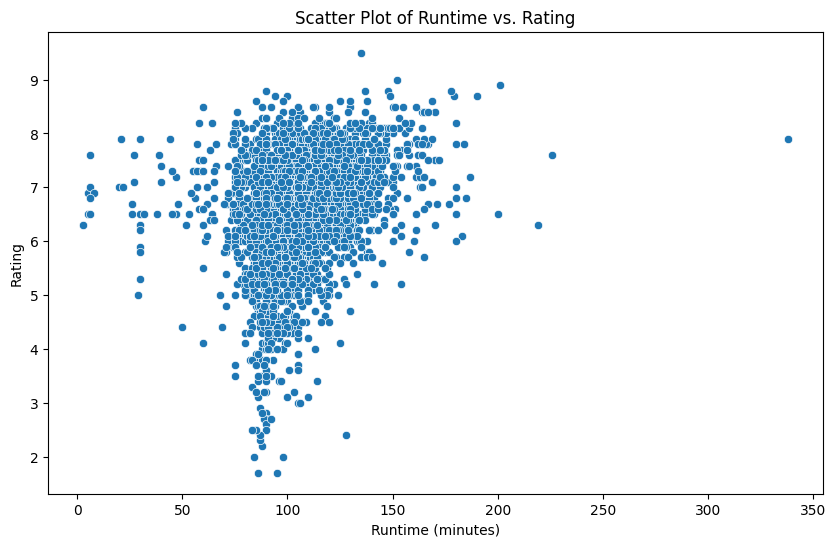

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='Rating', data=combined_df)
plt.title('Scatter Plot of Runtime vs. Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.show()

The scatter plot shows that most movies are between [82-140] minutes, those have ratings of 5.3 to 8.5 which suggests that a common runtime for movies is around this range, and these movies tend to have moderate to good ratings.

#### Second Visualization - Box Plot.

/tmp/ipykernel_64/334637745.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating = combined_df.groupby('Runtime_bin')['Rating'].mean().reset_index()
/tmp/ipykernel_64/334637745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Runtime_bin', y='Rating', data=average_rating, palette='viridis')


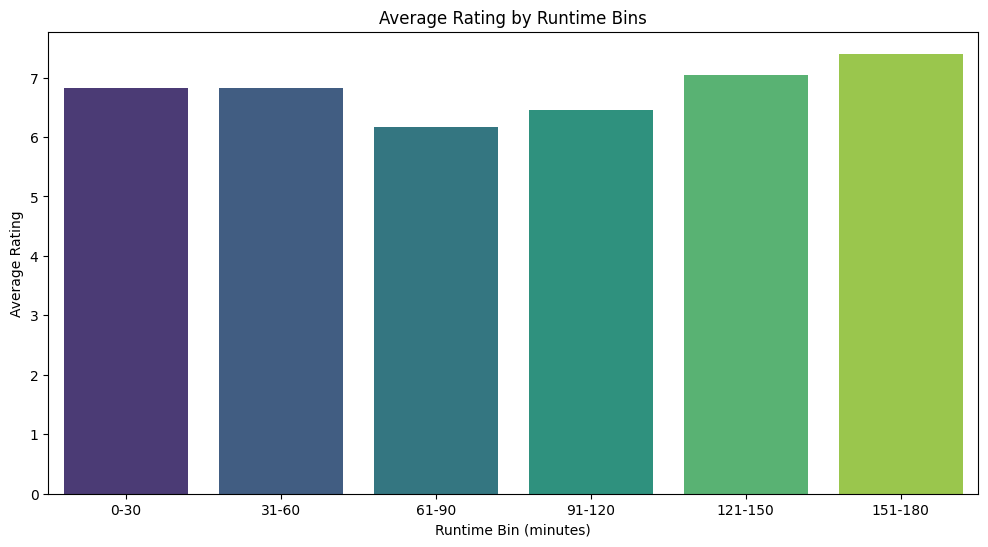

In [170]:
bins = [0, 30, 60, 90, 120, 150, 180]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180']

# Bin the data
combined_df['Runtime_bin'] = pd.cut(combined_df['Runtime'], bins=bins, labels=labels, right=False)

# Calculate average rating for each bin
average_rating = combined_df.groupby('Runtime_bin')['Rating'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Runtime_bin', y='Rating', data=average_rating, palette='viridis')
plt.title('Average Rating by Runtime Bins')
plt.xlabel('Runtime Bin (minutes)')
plt.ylabel('Average Rating')
plt.show()

### **5.2:** Reflection

I would go deeper into the impact of different genres and cast members on movie ratings. Specifically, analyze how varying genres might influence ratings and investigate whether specific cast members or ensemble casts correlate with longer or shorter films.

As for data quality issue Iwould like to investigate and handle outliers or anomalies that might skew the results.